In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv("KS_train_data.csv", delimiter=',') 
test = pd.read_csv("KS_test_data.csv", delimiter=';')

In [9]:
data['funded'].value_counts()

True     58454
False    41546
Name: funded, dtype: int64

<AxesSubplot:>

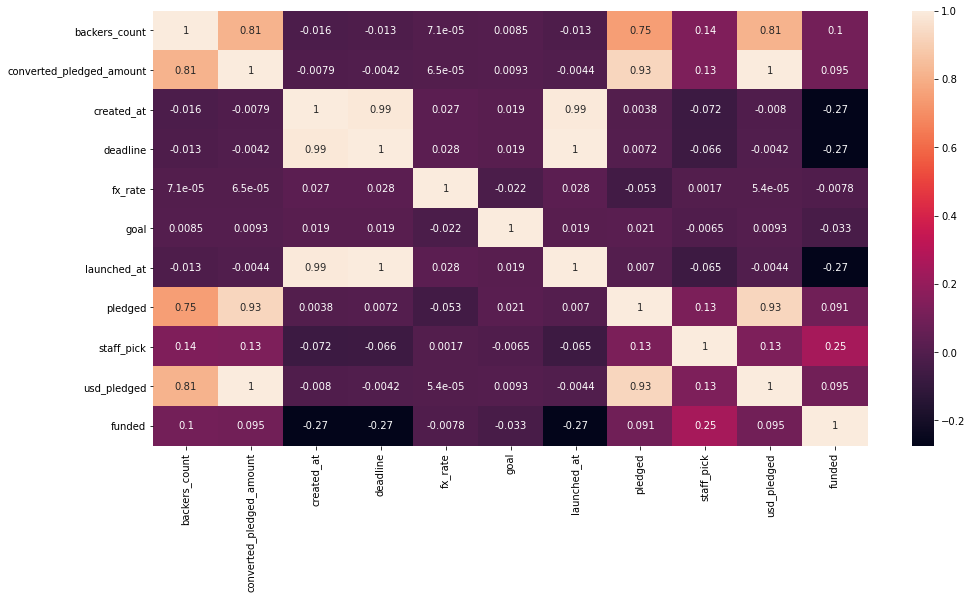

In [10]:
corrmat = data.corr()

sns.heatmap(corrmat, annot=True)

In [11]:
data['Prob_score'] = ""

index = 0
for row in data.category:
    if index == 0:
        category = row
        true_values = len(data[(data.category == row) & (data.funded == True)])
        total_values = len(data[(data.category == row)]) 
    elif row != category:
        category = row
        true_values = len(data[(data.category == row) & (data.funded == True)])
        total_values = len(data[(data.category == row)])
    data['Prob_score'][index] = true_values / total_values
    index += 1

In [12]:
data['rem_time'] = data['deadline'] - data['launched_at']

In [13]:
#here 2 possible outliers can be seen at the top
# data.nlargest(15,['converted_pledged_amount'] )
# pd.reset_option('display.max_rows')
# data.category.value_counts()
data['Prob_score'].head(10000)

0       0.558767
1       0.558767
2       0.558767
3       0.558767
4       0.558767
          ...   
9995    0.760194
9996    0.760194
9997    0.760194
9998    0.760194
9999    0.760194
Name: Prob_score, Length: 10000, dtype: object

<AxesSubplot:>

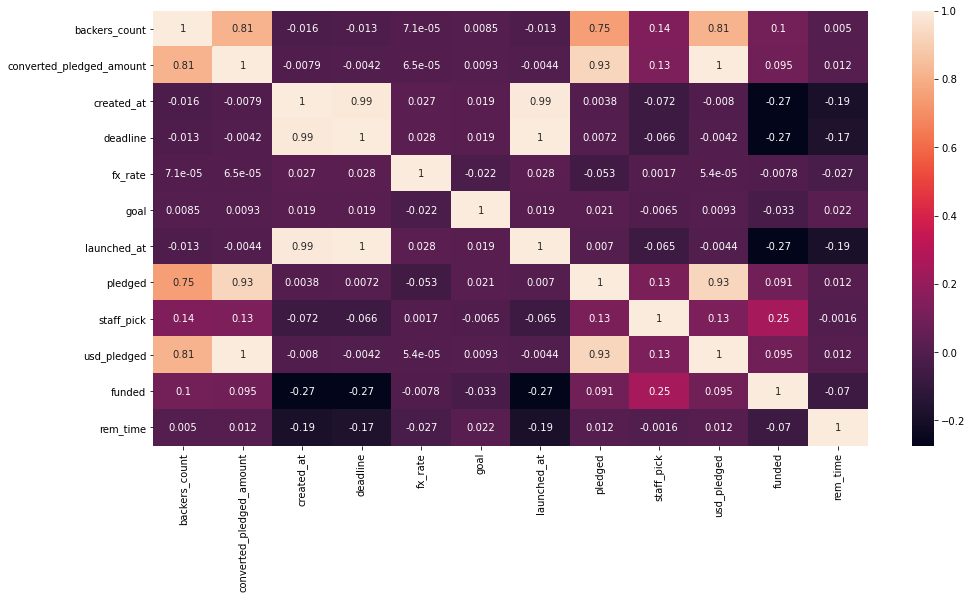

In [14]:
corrmat2 = data.corr()

sns.heatmap(corrmat2, annot=True)

In [15]:
data.head(1)

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,...,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url,Prob_score,rem_time
0,KS_000000,80,I will be an artist-in-residence at Elsewhere ...,art,3596,US,1325980505,USD,1334866560,1.0,...,3596.0,False,3596.0,"Paonia, CO",True,mixed media,https://www.kickstarter.com/projects/hilaryeme...,https://www.kickstarter.com/projects/hilaryeme...,0.558767,1897300


In [16]:
data['norm_goal'] = preprocessing.normalize([data.goal])[0]
data['norm_launched'] = preprocessing.normalize([data.launched_at])[0]
data['norm_deadline'] = preprocessing.normalize([data.deadline])[0]
data['norm_prob'] = preprocessing.normalize([data.Prob_score])[0]
data['norm_rem_time'] = preprocessing.normalize([data.deadline])[0]

In [17]:
#data = data.iloc[:,:].values()
#type(data)

In [18]:
#lol = LabelEncoder()
#data[:,3]=lol.fit_transform(data[:,3])
#trans = ColumnTransformer(transformers=[('le_transform', OneHotEncoder(),[3])], remainder= 'passthrough')
#data =trans.fit_transform(data)


In [19]:
one_hot_data = data
the_cat_columns = ['country','category']

for column in the_cat_columns:
    hot_col = pd.get_dummies(data[column], prefix=column)
    one_hot_data = pd.concat((one_hot_data, hot_col), axis=1).drop(column, axis=1)

In [20]:
one_hot_data

,project_id,backers_count,blurb,converted_pledged_amount,created_at,currency,deadline,fx_rate,goal,launched_at,...,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater
0,KS_000000,80,I will be an artist-in-residence at Elsewhere ...,3596,1325980505,USD,1334866560,1.000000,2800.0,1332969260,...,0,0,0,0,0,0,0,0,0,0
1,KS_000001,82,1000 Artists is a public art-making installati...,4586,1330926084,USD,1336440145,1.000000,4500.0,1332984145,...,0,0,0,0,0,0,0,0,0,0
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneH...",5217,1332382894,USD,1338175739,1.000000,5000.0,1332991739,...,0,0,0,0,0,0,0,0,0,0
3,KS_000003,37,A film exploring the role and value of art edu...,7160,1332342451,USD,1334806096,1.000000,6500.0,1332991696,...,0,0,0,0,0,0,0,0,0,0
4,KS_000004,153,We need to build a kitchen for Habitable Space...,15445,1328562617,USD,1335584240,1.000000,15000.0,1332992240,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,KS_099995,104,Make the workshop/ small stage space at Jimmy'...,7595,1348677893,USD,1356552252,1.000000,7000.0,1353960252,...,0,0,0,0,0,0,0,0,0,1
99996,KS_099996,307,Help create a permanent home for live comedy s...,27196,1364939099,USD,1367674009,1.000000,25000.0,1365082009,...,0,0,0,0,0,0,0,0,0,1
99997,KS_099997,143,Voix de Ville is a pop-up imaginarium of neo-v...,7226,1366078694,USD,1373738400,1.000000,5500.0,1370568560,...,0,0,0,0,0,0,0,0,0,1
99998,KS_099998,329,Help Synetic Theater create a new Studio to pr...,31683,1372177000,USD,1376654340,1.000000,25000.0,1373568644,...,0,0,0,0,0,0,0,0,0,1
